In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.shape

(30, 2)

In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


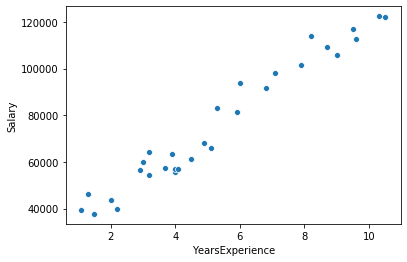

In [7]:
sns.scatterplot(df['YearsExperience'],df['Salary'])

In [8]:
x=df['YearsExperience'].values.reshape(30,1)

In [9]:
y=df['Salary'].values

In [10]:
x.shape

(30, 1)

In [11]:
y.shape

(30,)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model
max_r_score = 0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size = 0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    print('r2_score corresponding to random state ',r_state, ' is : ',r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state = r_state
print('\n\n')
print('Max r2_score corresponding to state ',final_r_state, ' is : ',max_r_score)

r2_score corresponding to random state  42  is :  0.9024461774180497
r2_score corresponding to random state  43  is :  0.8688045158887867
r2_score corresponding to random state  44  is :  0.934951117043928
r2_score corresponding to random state  45  is :  0.9250487875802144
r2_score corresponding to random state  46  is :  0.9789129767378081
r2_score corresponding to random state  47  is :  0.98399193890564
r2_score corresponding to random state  48  is :  0.980277279178695
r2_score corresponding to random state  49  is :  0.9497670285223545
r2_score corresponding to random state  50  is :  0.8824679635169839
r2_score corresponding to random state  51  is :  0.9608624689052039
r2_score corresponding to random state  52  is :  0.9743646706957547
r2_score corresponding to random state  53  is :  0.9501154883629506
r2_score corresponding to random state  54  is :  0.9492729968840661
r2_score corresponding to random state  55  is :  0.8924137091604106
r2_score corresponding to random state

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=78,test_size = 0.20)
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [14]:
reg.coef_

array([9462.878838])

In [15]:
reg.intercept_

25575.311612250458

In [17]:
print("ERROR")
print("Mean absolute error : ",mean_absolute_error(y_test,y_pred))
print("Mean squared error : ",mean_squared_error(y_test,y_pred))
print("Root Mean Squared error : ",np.sqrt(mean_squared_error(y_test,y_pred)))

ERROR
Mean absolute error :  2456.449488267112
Mean squared error :  11747876.388632124
Root Mean Squared error :  3427.5175256491575


In [18]:
r2_score(y_test,y_pred)

0.9861836585536035

In [19]:
from sklearn.externals import joblib
joblib.dump(reg,'Salary.pkl')

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Salary.pkl']